In [33]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator
from matplotlib.legend_handler import HandlerTuple
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from scipy.optimize import minimize
from sklearn.metrics import r2_score
import IPython
import imgkit
import mpltools.annotation as annotation

In [60]:
cncpeg = '/Users/ningravi/Desktop/Python/RawData ARESG2/CNC/20231203_Prof.Rakesh/CNC_PEG_20231203 (1).xls'

start_row = 3
end_row = 41

cncpeg_am_os_strain = pd.read_excel(cncpeg, sheet_name='Amplitude - 1', usecols=[3], nrows=end_row - start_row + 1, skiprows=range(1, start_row))
cncpeg_am_g1 = pd.read_excel(cncpeg, sheet_name='Amplitude - 1', usecols=[6], nrows=end_row - start_row + 1, skiprows=range(1, start_row))
cncpeg_am_g2 = pd.read_excel(cncpeg, sheet_name='Amplitude - 1', usecols=[7], nrows=end_row - start_row + 1, skiprows=range(1, start_row))

cncpeg_fre = pd.read_excel(cncpeg, sheet_name='Frequency - 2', usecols=[9], nrows=end_row - start_row + 1, skiprows=range(1, start_row))
cncpeg_fre_g1 = pd.read_excel(cncpeg, sheet_name='Frequency - 2', usecols=[6], nrows=end_row - start_row + 1, skiprows=range(1, start_row))
cncpeg_fre_g2 = pd.read_excel(cncpeg, sheet_name='Frequency - 2', usecols=[7], nrows=end_row - start_row + 1, skiprows=range(1, start_row))

start_row_flow = 3
end_row_flow = 50

cncpeg_fs_shearrate = pd.read_excel(cncpeg, sheet_name='Sweep - 3', usecols=[3], nrows=end_row_flow - start_row_flow + 1, skiprows=range(1, start_row_flow))
cncpeg_fs_viscosity = pd.read_excel(cncpeg, sheet_name='Sweep - 3', usecols=[4], nrows=end_row_flow - start_row_flow + 1, skiprows=range(1, start_row_flow))
cncpeg_fs_stress = pd.read_excel(cncpeg, sheet_name='Sweep - 3', usecols=[2], nrows=end_row_flow - start_row_flow + 1, skiprows=range(1, start_row_flow))

cncpeg_tempt_os_strain = pd.read_excel(cncpeg, sheet_name='Temperature Ramp - 4', usecols=[2], nrows=end_row - start_row + 1, skiprows=range(1, start_row))
cncpeg_tempt_g1 = pd.read_excel(cncpeg, sheet_name='Temperature Ramp - 4', usecols=[6], nrows=end_row - start_row + 1, skiprows=range(1, start_row))
cncpeg_tempt_g2 = pd.read_excel(cncpeg, sheet_name='Temperature Ramp - 4', usecols=[7], nrows=end_row - start_row + 1, skiprows=range(1, start_row))


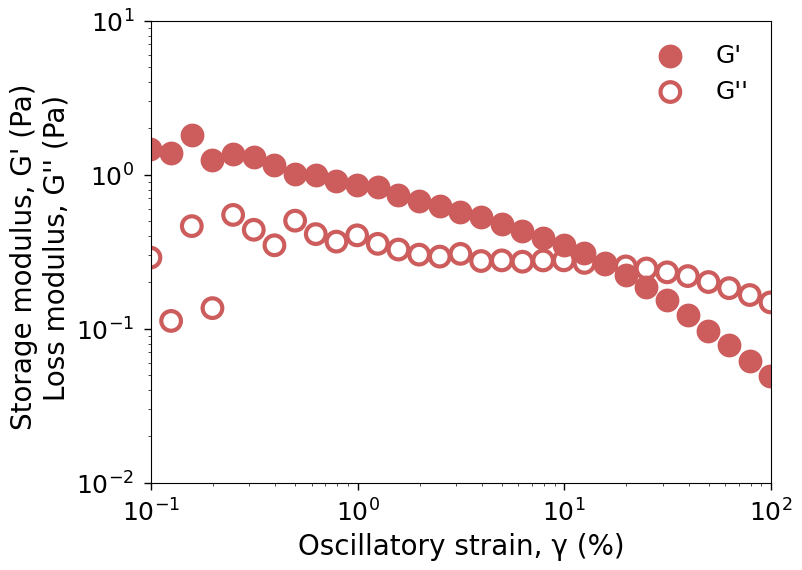

In [61]:
fig, ax = plt.subplots(figsize=(8,6))

c = 'indianred'
scatter1 = plt.scatter(cncpeg_am_os_strain, cncpeg_am_g1,s =200, alpha=1,
                       marker='o', facecolors=c, edgecolors=c, linewidths=3, label="G'" )
scatter2 = plt.scatter(cncpeg_am_os_strain, cncpeg_am_g2,s =200, alpha=1,
                       marker='o', facecolors=c, edgecolors=c, linewidths=3, label="G''")
scatter2.set_facecolor('none') 

plt.style.use('seaborn-notebook')
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Oscillatory strain, γ (%)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.1, 100)
plt.ylim(0.01, 10)
plt.legend(frameon=False, fontsize=18)
plt.show()

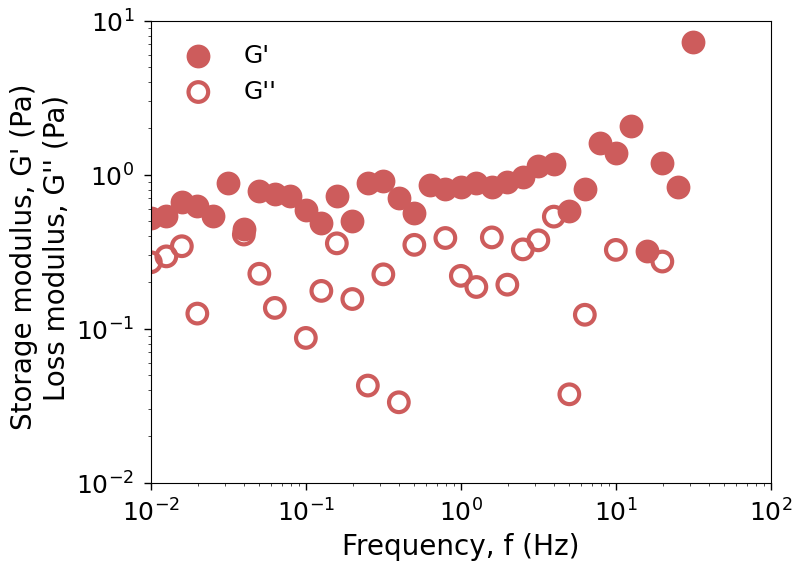

In [62]:
fig, ax = plt.subplots(figsize=(8,6))

c = 'indianred'

scatter3 = plt.scatter(cncpeg_fre, cncpeg_fre_g1,s =200, alpha=1,
                       marker='o', facecolors=c, edgecolors=c, linewidths=3, label="G'" )
scatter4 = plt.scatter(cncpeg_fre, cncpeg_fre_g2,s =200, alpha=1,
                       marker='o', facecolors=c, edgecolors=c, linewidths=3, label="G''")
scatter4.set_facecolor('none') 

plt.style.use('seaborn-notebook')
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Frequency, f (Hz)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.01, 100)
plt.ylim(0.01, 10)
plt.legend(frameon=False, fontsize=18)
plt.show()

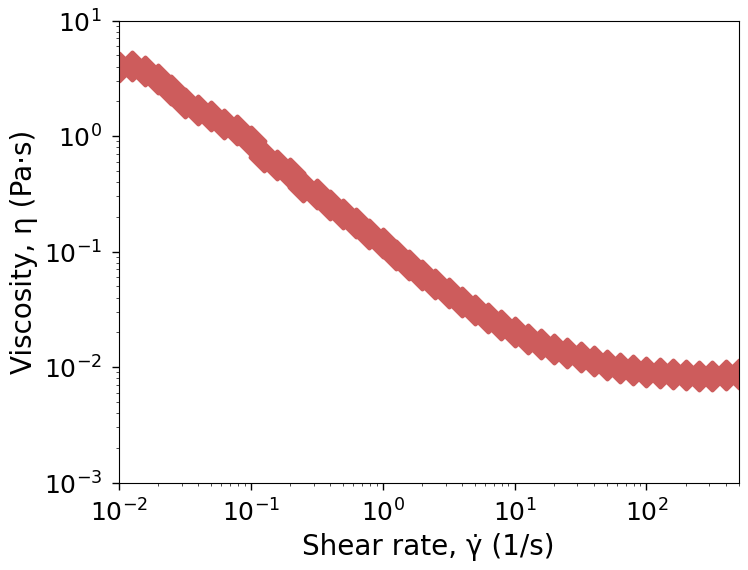

In [67]:
fig, ax = plt.subplots(figsize=(8,6))

c = 'indianred'

scatter5 = plt.scatter(cncpeg_fs_shearrate, cncpeg_fs_viscosity,s =200, alpha=1,
                       marker='D', facecolors=c, edgecolors=c, linewidths=3)

plt.style.use('seaborn-notebook')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Shear rate, γ̇ (1/s)", fontsize=20)
plt.ylabel("Viscosity, \u03B7 (Pa\u00B7s)", fontsize=20)  
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0.01, 500)
plt.ylim(0.001, 10)
plt.show()

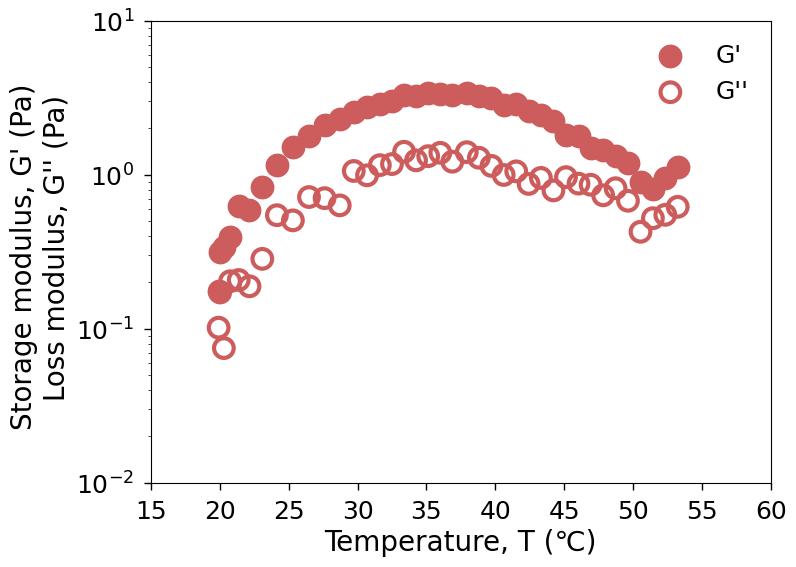

In [70]:
fig, ax = plt.subplots(figsize=(8,6))

c = 'indianred'
scatter6 = plt.scatter(cncpeg_tempt_os_strain, cncpeg_tempt_g1,s =200, alpha=1,
                       marker='o', facecolors=c, edgecolors=c, linewidths=3, label="G'" )
scatter7 = plt.scatter(cncpeg_tempt_os_strain, cncpeg_tempt_g2,s =200, alpha=1,
                       marker='o', facecolors=c, edgecolors=c, linewidths=3, label="G''")
scatter7.set_facecolor('none') 

plt.style.use('seaborn-notebook')
#plt.xscale("log")
plt.yscale("log")
plt.xlabel('Temperature, T (\u2103)', fontsize=20)
plt.ylabel("Storage modulus, G' (Pa) \n Loss modulus, G'' (Pa)", fontsize=20)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(15, 60)
plt.ylim(0.01, 10)
plt.legend(frameon=False, fontsize=18)
plt.show()